
# Zajęcie 1 — Pandas + Jupyter

**Dane:** IHME — Global Burden of Disease Study 2019 (fragment CSV).  
**Plik:** `IHME-GBD_2019_DATA-ff08d9bc-1.csv`



## 0. Przygotowanie środowiska

Ten blok importuje biblioteki i ustawia kilka opcji wyświetlania.  


In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ustawienia pandas (ładniejsze wydruki)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

# Ścieżki do plików (zmień jeśli przeniesiesz pliki)
DATA_PATH = "IHME-GBD_2019_DATA-ff08d9bc-1.csv"
OUT_CSV = "wynik_przetworzony.csv"

print("Wersje:")
print("pandas:", pd.__version__)
print("numpy :", np.__version__)


Wersje:
pandas: 2.2.3
numpy : 2.1.3



## 1. Załadowanie biblioteki pandas + tworzenie ramki danych ze słownika


In [15]:

# Tworzenie DataFrame ze słownika (kolumny -> listy wartości)
dane_slownik = {
    "kraj": ["Poland", "Germany", "France"],
    "rok": [2019, 2019, 2019],
    "wartosc": [100, 200, 150]
}
df_slownik = pd.DataFrame(dane_slownik)
df_slownik


,kraj,rok,wartosc
0,Poland,2019,100
1,Germany,2019,200
2,France,2019,150



## 2. Tworzenie ramki danych z listy list


In [16]:

# Lista list + nazwy kolumn
dane_lol = [
    ["A", 1.0],
    ["B", 2.5],
    ["C", 3.3]
]
df_lol = pd.DataFrame(dane_lol, columns=["etykieta", "liczba"])
df_lol


,etykieta,liczba
0,A,1.0
1,B,2.5
2,C,3.3



## 3. Wczytanie głównego zbioru danych (CSV) i zapis do CSV/XLSX



In [17]:

# Wczytanie CSV (IHME GBD 2019)
df = pd.read_csv(DATA_PATH)

# Podgląd rozmiaru
print("Kształt (wiersze, kolumny):", df.shape)

# Zapis kopii do CSV
df.to_csv(OUT_CSV, index=False)
print("Zapisano do pliku:", OUT_CSV)

df.head(3)


Kształt (wiersze, kolumny): (257040, 10)
Zapisano do pliku: wynik_przetworzony.csv


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986



## 4. Transponowanie ramki danych


In [18]:

# Uwaga: transpozycja pełnego df może być ciężka.
# Pokażemy transpozycję na próbce 5 wierszy i 6 kolumn.
sample_cols = list(df.columns)[:6]
df_sample = df.loc[:4, sample_cols]
df_transposed = df_sample.T
df_transposed


,0,1,2,3,4
measure,Deaths,Deaths,Deaths,Deaths,Deaths
location,Samoa,Samoa,Samoa,Samoa,Samoa
sex,Male,Female,Both,Male,Female
age,All Ages,All Ages,All Ages,All Ages,All Ages
cause,Chronic respiratory diseases,Chronic respiratory diseases,Chronic respiratory diseases,Skin and subcutaneous diseases,Skin and subcutaneous diseases
metric,Rate,Rate,Rate,Rate,Rate



## 5. Podstawowe przeglądanie danych
- pierwsze 10 wierszy
- ostatnie 10 wierszy
- `info()`
- liczba wierszy i kolumn


In [36]:

import io

pierwsze10 = df.head(10)
ostatnie10 = df.tail(10)

print("INFO:")
buf = io.StringIO()
df.info(buf=buf)
info_str = buf.getvalue()
print(info_str)

print("\nRozmiar:", df.shape)
pierwsze10, ostatnie10


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257040 entries, 0 to 257039
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   measure   257040 non-null  object 
 1   location  257040 non-null  object 
 2   sex       257040 non-null  object 
 3   age       257040 non-null  object 
 4   cause     257040 non-null  object 
 5   metric    257040 non-null  object 
 6   year      257040 non-null  int64  
 7   val       257040 non-null  float64
 8   upper     257040 non-null  float64
 9   lower     257040 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 19.6+ MB


Rozmiar: (257040, 10)


(  measure location     sex       age                           cause metric  \
 0  Deaths    Samoa    Male  All Ages    Chronic respiratory diseases   Rate   
 1  Deaths    Samoa  Female  All Ages    Chronic respiratory diseases   Rate   
 2  Deaths    Samoa    Both  All Ages    Chronic respiratory diseases   Rate   
 3  Deaths    Samoa    Male  All Ages  Skin and subcutaneous diseases   Rate   
 4  Deaths    Samoa  Female  All Ages  Skin and subcutaneous diseases   Rate   
 5  Deaths    Samoa    Both  All Ages  Skin and subcutaneous diseases   Rate   
 6  Deaths    Samoa    Male  All Ages              Transport injuries   Rate   
 7  Deaths    Samoa  Female  All Ages              Transport injuries   Rate   
 8  Deaths    Samoa    Both  All Ages              Transport injuries   Rate   
 9  Deaths    Samoa    Male  All Ages          Unintentional injuries   Rate   
 
    year        val      upper      lower  
 0  2000  64.470214  81.808307  53.476793  
 1  2000  55.234399  77.883497


## 6. Statystyki opisowe
- kolumny liczbowe (`describe()`)
- kolumny kategoryczne (`describe(include='object')`)


In [21]:

stat_liczbowe = df.describe()
stat_kat = df.describe(include='object')

stat_liczbowe, stat_kat


(                year            val          upper          lower
 count  257040.000000  257040.000000  257040.000000  257040.000000
 mean     2009.500000      38.800590      47.928737      31.471947
 std         5.766293      78.404349      90.084317      68.696407
 min      2000.000000       0.000007       0.000010       0.000004
 25%      2004.750000       1.886851       2.501180       1.316783
 50%      2009.500000      14.271807      18.665022      10.660142
 75%      2014.250000      38.132807      49.665292      28.921071
 max      2019.000000    2754.279032    3029.881582    2511.135907,
        measure location     sex       age                         cause  \
 count   257040   257040  257040    257040                        257040   
 unique       1      204       3         1                            21   
 top     Deaths    Samoa    Male  All Ages  Chronic respiratory diseases   
 freq    257040     1260   85680    257040                         12240   
 
         metri


## 7. Braki danych — usuwanie/uzupełnianie


In [22]:

# Liczba braków w każdej kolumnie
braki = df.isna().sum().sort_values(ascending=False)
print("Braki danych (top 10 kolumn):")
print(braki.head(10))

# Usuwanie wierszy z brakami w wybranych kluczowych kolumnach (jeśli występują)
kluczowe = [c for c in ["location_name", "measure_name", "sex", "val"] if c in df.columns]
df_clean = df.dropna(subset=kluczowe) if kluczowe else df.dropna()

print("\nKształt przed:", df.shape, "po:", df_clean.shape)
df_clean.head(3)


Braki danych (top 10 kolumn):
measure     0
location    0
sex         0
age         0
cause       0
metric      0
year        0
val         0
upper       0
lower       0
dtype: int64

Kształt przed: (257040, 10) po: (257040, 10)


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986



## 8. Wybór wierszy/kolumn (`loc`, `iloc`) oraz filtrowanie warunkowe


In [23]:

# Wybór kolumn po nazwie
kolumny_podstawowe = [c for c in ["location_name", "year", "sex", "cause_name", "val"] if c in df_clean.columns]
df_subset = df_clean[kolumny_podstawowe].head(10)
print("Podzbiór kolumn:")
display(df_subset)

# Wybór wierszy po indeksie (iloc)
df_iloc = df_clean.iloc[0:5, 0:5]
print("\niloc[0:5, 0:5]:")
display(df_iloc)

# Filtrowanie: np. Polska i rok >= 2010 (jeśli kolumny istnieją)
mask = pd.Series([True] * len(df_clean))
if "location_name" in df_clean and "year" in df_clean:
    mask = (df_clean["location_name"] == "Poland") & (df_clean["year"] >= 2010)
    wyniki_PL = df_clean.loc[mask, kolumny_podstawowe].head(10)
    print("\nPolska, rok >= 2010:")
    display(wyniki_PL)

# Filtrowanie po kilku warunkach (np. Polska, płeć 'Both', miernik 'Deaths', jeśli istnieją)
warunki = []
if "sex" in df_clean: warunki.append(df_clean["sex"].isin(["Both"]))
if "measure_name" in df_clean: warunki.append(df_clean["measure_name"].isin(["Deaths"]))
if "location_name" in df_clean: warunki.append(df_clean["location_name"].eq("Poland"))
if warunki:
    mask_multi = np.logical_and.reduce(warunki)
    display(df_clean.loc[mask_multi, kolumny_podstawowe].head(10))


Podzbiór kolumn:


,year,sex,val
0,2000,Male,64.470214
1,2000,Female,55.234399
2,2000,Both,60.039961
3,2000,Male,2.246741
4,2000,Female,1.368385
5,2000,Both,1.825409
6,2000,Male,25.920294
7,2000,Female,10.099048
8,2000,Both,18.331128
9,2000,Male,28.989384



iloc[0:5, 0:5]:


,measure,location,sex,age,cause
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases


,year,sex,val
2,2000,Both,60.039961
5,2000,Both,1.825409
8,2000,Both,18.331128
11,2000,Both,20.717772
14,2000,Both,0.618564
17,2000,Both,23.377914
20,2000,Both,20.997271
23,2000,Both,130.375850
26,2000,Both,68.045065
29,2000,Both,23.092421



## 9. Filtrowanie tekstowe (`str.contains`) i jego negacja


In [25]:

if "cause_name" in df_clean:
    zawiera = df_clean["cause_name"].str.contains("cancer", case=False, na=False)
    nie_zawiera = ~zawiera
    print("Wiersze z 'cancer':", zawiera.sum())
    print("Wiersze bez 'cancer':", nie_zawiera.sum())
    display(df_clean.loc[zawiera, kolumny_podstawowe].head(5))



## 10. Operacje na kolumnach: dodawanie, usuwanie, zmiana nazwy


In [26]:

df_work = df_clean.copy()

# Dodajemy kolumnę z logarytmem wartości (o ile 'val' istnieje i > 0)
if "val" in df_work:
    df_work = df_work[df_work["val"].notna() & (df_work["val"] > 0)]
    df_work["log_val"] = np.log(df_work["val"])

# Usuwamy pomocniczą kolumnę, jeśli istnieje
if "log_val" in df_work.columns:
    df_tmp = df_work.drop(columns=["log_val"]).copy()
else:
    df_tmp = df_work.copy()

# Zmieniamy nazwę kolumny 'val' na 'wartosc' (jeśli istnieje)
df_renamed = df_tmp.rename(columns={"val": "wartosc"}) if "val" in df_tmp.columns else df_tmp
df_renamed.head(3)


,measure,location,sex,age,cause,metric,year,wartosc,upper,lower
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986



## 11. Zapis ramki danych do pliku CSV


In [27]:

df_renamed.to_csv("df_renamed.csv", index=False)
print("Zapisano plik df_renamed.csv")


Zapisano plik df_renamed.csv



## 12. Agregacje i wartości unikalne
- średnia / min / max z jednej kolumny
- liczba wierszy
- wartości unikalne w kolumnie
- `value_counts()`


In [28]:

if "wartosc" in df_renamed:
    print("Średnia:", df_renamed["wartosc"].mean())
    print("Minimum:", df_renamed["wartosc"].min())
    print("Maksimum:", df_renamed["wartosc"].max())

print("Liczba wierszy:", len(df_renamed))

if "location_name" in df_renamed:
    print("\nUnikalne location_name (do 10):", df_renamed["location_name"].unique()[:10])
    print("\nTop 5 krajów wg liczby rekordów:")
    display(df_renamed["location_name"].value_counts().head(5))


Średnia: 38.800590204586584
Minimum: 6.654170010575565e-06
Maksimum: 2754.2790315673674
Liczba wierszy: 257040



## 13. Sortowanie i top-N


In [29]:

# Sortowanie malejąco po 'wartosc' (jeśli istnieje)
if "wartosc" in df_renamed:
    posortowane = df_renamed.sort_values("wartosc", ascending=False)
    display(posortowane.head(5))
    # 10 największych (bez warunku)
    display(df_renamed.nlargest(10, "wartosc"))
    # 10 największych pod warunkiem (np. Polska)
    if "location_name" in df_renamed:
        mask_pl = df_renamed["location_name"].eq("Poland")
        display(df_renamed.loc[mask_pl].nlargest(10, "wartosc"))


,measure,location,sex,age,cause,metric,year,wartosc,upper,lower
85701,Deaths,Haiti,Male,All Ages,Unintentional injuries,Rate,2010,2754.279032,3029.881582,2511.135907
85703,Deaths,Haiti,Both,All Ages,Unintentional injuries,Rate,2010,2199.133930,2416.170674,2003.802176
85702,Deaths,Haiti,Female,All Ages,Unintentional injuries,Rate,2010,1677.044385,1845.673574,1524.945269
224318,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2019,1177.059351,1389.915309,990.814152
207155,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2018,1154.803495,1334.438294,987.855957


,measure,location,sex,age,cause,metric,year,wartosc,upper,lower
85701,Deaths,Haiti,Male,All Ages,Unintentional injuries,Rate,2010,2754.279032,3029.881582,2511.135907
85703,Deaths,Haiti,Both,All Ages,Unintentional injuries,Rate,2010,2199.133930,2416.170674,2003.802176
85702,Deaths,Haiti,Female,All Ages,Unintentional injuries,Rate,2010,1677.044385,1845.673574,1524.945269
224318,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2019,1177.059351,1389.915309,990.814152
207155,Deaths,Bulgaria,Female,All Ages,Cardiovascular diseases,Rate,2018,1154.803495,1334.438294,987.855957
1317,Deaths,Bulgaria,Male,All Ages,Cardiovascular diseases,Rate,2000,1150.098307,1210.705449,1087.864035
240247,Deaths,Bulgaria,Male,All Ages,Cardiovascular diseases,Rate,2001,1145.214616,1207.510477,1085.883806
224319,Deaths,Bulgaria,Both,All Ages,Cardiovascular diseases,Rate,2019,1140.933052,1349.387220,960.194209
236008,Deaths,Bulgaria,Male,All Ages,Cardiovascular diseases,Rate,2002,1137.585718,1194.601392,1079.554455
256080,Deaths,Bulgaria,Male,All Ages,Cardiovascular diseases,Rate,2003,1133.211234,1192.209039,1073.048390



## 14. Grupowanie (GroupBy) i MultiIndex
- Średnia wszystkich kolumn liczbowych w grupach
- Różne agregacje dla różnych kolumn (`agg`)
- Nazwy i sortowanie indeksu złożonego


In [30]:

# Grupa według kraju i roku, jeśli dostępne
group_cols = [c for c in ["location_name", "year", "sex"] if c in df_renamed.columns]
if group_cols:
    gb = df_renamed.groupby(group_cols)
    # Średnia wszystkich kolumn liczbowych
    s1 = gb.mean(numeric_only=True)
    print("Mean w grupach (top 5):")
    display(s1.head(5))

    # Różne agregacje
    agg_dict = {}
    if "wartosc" in df_renamed: agg_dict["wartosc"] = ["mean", "median", "count"]
    if "upper" in df_renamed:   agg_dict["upper"] = ["mean"]
    if "lower" in df_renamed:   agg_dict["lower"] = ["mean"]
    if agg_dict:
        s2 = gb.agg(agg_dict)
        print("\nRóżne agregacje (top 5):")
        display(s2.head(5))
        # Nazwy kolumn indeksu złożonego
        if hasattr(s2.index, "names"):
            print("\nNazwy poziomów indeksu:", s2.index.names)
        # Sortowanie indeksu
        s2_sorted = s2.sort_index()
        print("\nPo sortowaniu indeksu:")
        display(s2_sorted.head(3))


Mean w grupach (top 5):


wartosc      upper      lower
year sex                                    
2000 Both    42.071643  51.579801  34.409596
     Female  38.758310  49.334502  30.406743
     Male    45.432669  56.068275  37.038712
2001 Both    41.701340  50.953481  34.167874
     Female  38.458481  48.807292  30.239393


Różne agregacje (top 5):


wartosc                       upper      lower
                  mean     median count       mean       mean
year sex                                                     
2000 Both    42.071643  16.807300  4284  51.579801  34.409596
     Female  38.758310  12.276991  4284  49.334502  30.406743
     Male    45.432669  19.771237  4284  56.068275  37.038712
2001 Both    41.701340  16.505294  4284  50.953481  34.167874
     Female  38.458481  12.128533  4284  48.807292  30.239393


Nazwy poziomów indeksu: ['year', 'sex']

Po sortowaniu indeksu:


wartosc                       upper      lower
                  mean     median count       mean       mean
year sex                                                     
2000 Both    42.071643  16.807300  4284  51.579801  34.409596
     Female  38.758310  12.276991  4284  49.334502  30.406743
     Male    45.432669  19.771237  4284  56.068275  37.038712


## 15. Tabela przestawna (pivot table) i wykresy


Indeks pivot: year
Kolumny pivot: ['Both', 'Female', 'Male']


sex,Both,Female,Male
year,,,
2000,42.071643,38.758310,45.432669
2001,41.701340,38.458481,44.994090
2002,41.537033,38.312801,44.808311
2003,41.242078,38.069214,44.457100
2004,40.817683,37.655908,44.024302
2005,40.339595,37.191768,43.537910
2006,39.761904,36.637091,42.937021
2007,39.260884,36.098711,42.480945
2008,38.825940,35.651128,42.056659


<Figure size 640x480 with 0 Axes>

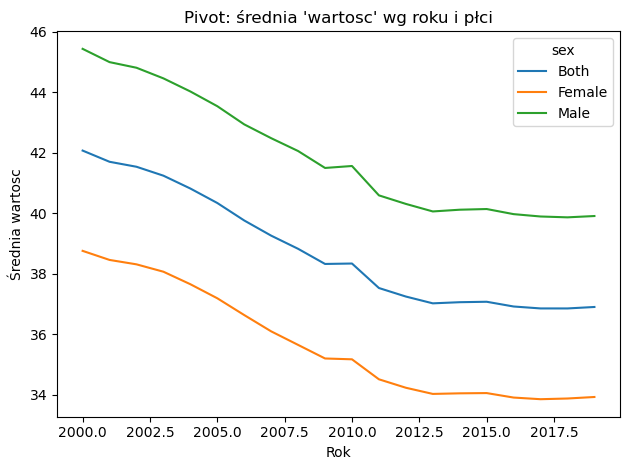

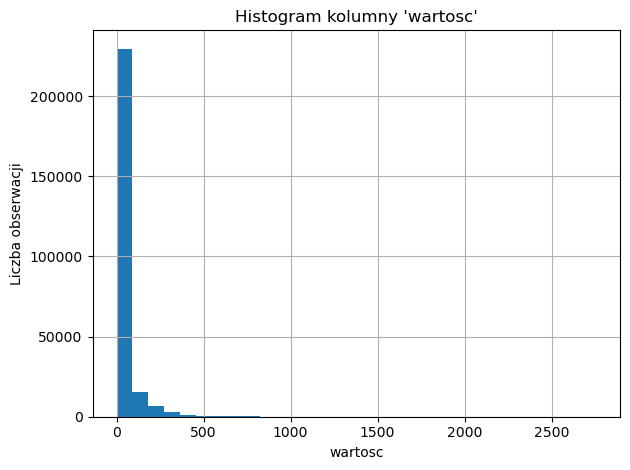

In [31]:

# Pivot: wiersze=rok, kolumny=sex, wartości=wartosc (jeśli kolumny istnieją)
obecne = set(df_renamed.columns)
if {"year", "sex", "wartosc"}.issubset(obecne):
    pivot = pd.pivot_table(df_renamed, index="year", columns="sex", values="wartosc", aggfunc="mean")
    print("Indeks pivot:", pivot.index.name)
    print("Kolumny pivot:", list(pivot.columns))
    display(pivot.head(10))

    # Wykres liniowy z pivot
    plt.figure()
    pivot.plot()
    plt.title("Pivot: średnia 'wartosc' wg roku i płci")
    plt.xlabel("Rok")
    plt.ylabel("Średnia wartosc")
    plt.tight_layout()
    plt.show()

    # Histogram jednej kolumny (np. wartosc)
    plt.figure()
    df_renamed["wartosc"].hist(bins=30)
    plt.title("Histogram kolumny 'wartosc'")
    plt.xlabel("wartosc")
    plt.ylabel("Liczba obserwacji")
    plt.tight_layout()
    plt.show()



## 16. Łączenie danych: `merge` i `concat`


In [32]:

# Przykładowe tabele do łączenia
left = pd.DataFrame({"id": [1,2,3], "kraj": ["Poland", "Germany", "France"]})
right = pd.DataFrame({"id": [1,2,4], "kod": ["PL", "DE", "ES"]})

polaczone_merge = left.merge(right, on="id", how="left")
print("merge(left, right, on='id', how='left')")
display(polaczone_merge)

# concat: łączenie wierszy
c1 = pd.DataFrame({"x":[1,2], "y":["a","b"]})
c2 = pd.DataFrame({"x":[3,4], "y":["c","d"]})
polaczone_concat = pd.concat([c1, c2], axis=0, ignore_index=True)
print("\nconcat([c1, c2], axis=0)")
display(polaczone_concat)

# Dodawanie nowych kolumn działaniami matematycznymi i lambda
mini = df_renamed.head(5).copy()
if "wartosc" in mini:
    mini["x2"] = mini["wartosc"] * 2
    mini["log_wartosc"] = mini["wartosc"].apply(lambda v: np.log(v) if pd.notna(v) and v>0 else np.nan)
display(mini)


merge(left, right, on='id', how='left')


,id,kraj,kod
0,1,Poland,PL
1,2,Germany,DE
2,3,France,NaN



concat([c1, c2], axis=0)


,x,y
0,1,a
1,2,b
2,3,c
3,4,d


,measure,location,sex,age,cause,metric,year,wartosc,upper,lower,x2,log_wartosc
0,Deaths,Samoa,Male,All Ages,Chronic respiratory diseases,Rate,2000,64.470214,81.808307,53.476793,128.940429,4.166203
1,Deaths,Samoa,Female,All Ages,Chronic respiratory diseases,Rate,2000,55.234399,77.883497,39.978647,110.468798,4.011586
2,Deaths,Samoa,Both,All Ages,Chronic respiratory diseases,Rate,2000,60.039961,76.013089,49.941986,120.079921,4.095010
3,Deaths,Samoa,Male,All Ages,Skin and subcutaneous diseases,Rate,2000,2.246741,3.467454,1.438979,4.493483,0.809481
4,Deaths,Samoa,Female,All Ages,Skin and subcutaneous diseases,Rate,2000,1.368385,1.945448,0.866099,2.736769,0.313631



## 17. Praca z dużymi plikami: `chunksize`


In [33]:

# Przetwarzanie w kawałkach — policzmy sumę 'wartosc' dla Polski po roku
if {"location_name", "year"}.issubset(df_renamed.columns) and ("wartosc" in df_renamed.columns):
    suma_po_roku = {}
    for chunk in pd.read_csv(DATA_PATH, chunksize=100_000):
        if "val" in chunk.columns:
            chunk = chunk.rename(columns={"val":"wartosc"})
        mask = (chunk.get("location_name") == "Poland")
        if "year" in chunk.columns:
            grupy = chunk.loc[mask].groupby("year")["wartosc"].sum()
            for r, v in grupy.items():
                suma_po_roku[r] = suma_po_roku.get(r, 0) + v
    # Zamień na DataFrame i pokaż top 10 lat
    df_suma = pd.DataFrame(sorted(suma_po_roku.items()), columns=["rok", "suma_wartosc"])
    display(df_suma.head(10))
